# Project: Cardio Vascular Disease  - Data Analysis

# Examining Factors Responsible for Heart Attacks

# Description:

Cardiovascular diseases are one of the leading causes of deaths globally. To identify the causes and develop a system to predict potential heart attacks in an effective manner is necessary. The data presented has all the information about relevant factors that might have an impact on cardiovascular health. The data needs to be studied in detail for further analysis.

There is one dataset data that has 14 attributes with 303 data points.

We are required to determine and examine the factors that play a significant role in increasing the rate of heart attacks. Also, use the findings to create and predict a model.

# Domain: Healthcare

# Data:    
 1. CVD_data.xsls

# Importing Libraries:

In [1]:
### Importing required libraries - Pandas ,Numpy, Seaborn, Matplotlib...

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Data:

In [2]:
### Importing the Primary dataset "CVD_data.xlsx" as a dataframe "df"

df = pd.read_excel('CVD_data.xlsx')
print('Dimensions:', df.shape)
df.head()

Dimensions: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preprocessing:

1.Perform preliminary data inspection and report the findings as the "Structure"  of the data, "Missing values" and "Duplicates".

2.Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

# Structure:

In [3]:
### Getting the list of variables (columns) present in the dataset ... 

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
### Getting the 'Structure' of the dataset by 'df.info'  function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Missing values:

In [5]:
### Alternately we can also crosscheck for the number of null values present in the dataset as follows:

Null = df.isnull().sum()
print(Null[Null>0])

Series([], dtype: int64)


No nulls present in the dataset.

# Duplicates:

In [6]:
### Checking for any duplicate values in the dataset ..

df.duplicated().sum()

1

One duplicated observation is found in the dataset , lets drop it from the dataset.

In [7]:
### Dropping the Duplicate values....

print('Total number of rows n columns before dropping Duplicate value:',df.shape)

df = df.drop_duplicates()

print('Total number of rows n columns after dropping Duplicate value:',df.shape)

Total number of rows n columns before dropping Duplicate value: (303, 14)
Total number of rows n columns after dropping Duplicate value: (302, 14)


Thus the 1 Duplicate value removed successfully  from the dataset .

# 3.Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

# Statistical summary:

Although all the variables have "int64" or "float64" dtypes, the dataset contains categorical variables that need to be converted to category dtype before getting a statistical summary.

In [8]:
### Converting the categorical variables to categorical dtypes...

df['sex'] = pd.Categorical(df['sex'])
df['cp'] = pd.Categorical(df['cp'])
df['fbs'] = pd.Categorical(df['fbs'])
df['restecg'] = pd.Categorical(df['restecg'])
df['exang'] = pd.Categorical(df['exang'])
df['thal'] = pd.Categorical(df['thal'])
df['target'] = pd.Categorical(df['target'])
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope          int64
ca             int64
thal        category
target      category
dtype: object

In [9]:
### Getting a breif Statistical summary of the dataset.

df.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,1.397351,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.616274,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,1.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,2.000000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000


# Exploratory Data Analysis:

# 4.Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

To explore the "Categorical" variables, First let us separate them from the "Continous"(numerical) variables as follows:

In [10]:
#### Separating "Continous" (numerical) variables ...  

Continous = df.describe().columns
df[Continous]

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,63,145,233,150,2.3,0,0
1,37,130,250,187,3.5,0,0
2,41,130,204,172,1.4,2,0
3,56,120,236,178,0.8,2,0
4,57,120,354,163,0.6,2,0
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0
299,45,110,264,132,1.2,1,0
300,68,144,193,141,3.4,1,2
301,57,130,131,115,1.2,1,1


In [11]:
#### Separating "Categorical" variables ...  
Category = df.columns.drop(Continous)
df[Category]

,sex,cp,fbs,restecg,exang,thal,target
0,1,3,1,0,0,1,1
1,1,2,0,1,0,2,1
2,0,1,0,0,0,2,1
3,1,1,0,1,0,2,1
4,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...
298,0,0,0,1,1,3,0
299,1,3,0,1,0,3,0
300,1,0,1,1,0,3,0
301,1,0,0,1,1,3,0


# Visualization:

Plotting the Categorical variables by "Countplot"  using "Seaborn" Library.

<AxesSubplot:xlabel='sex', ylabel='count'>

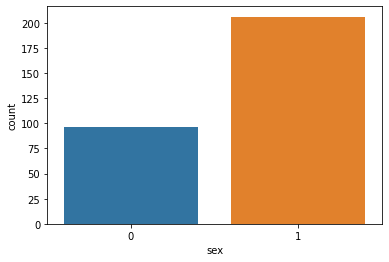

In [12]:
### Plotting a count plot of "sex" variable.
sns.countplot(df.sex)

From the above plot, We see that the dataset has about "200" "Males" (1) and "100" "Females" (0).

<AxesSubplot:xlabel='fbs', ylabel='count'>

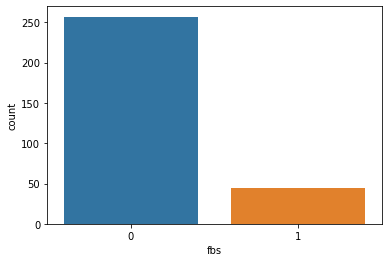

In [13]:
### Plotting a count plot of "fbs" variable.
sns.countplot(df.fbs)

From the above plot, We may assume most of the patients are "Non Diabetic". Only about " 50"  patients are "Diabetic" ((1)fasting blood sugar > 120 mg/dl)

<AxesSubplot:xlabel='exang', ylabel='count'>

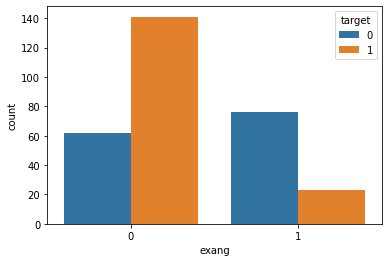

In [14]:
### Plotting a count plot of "exang" variable.
sns.countplot(df.exang, hue = df['target'])

From the above plot, We may assume that patients that experienced "Exercise induced Angina" are less susceptible to "Cardio Vascular Disease".



<AxesSubplot:xlabel='cp', ylabel='count'>

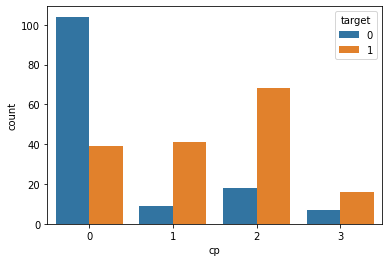

In [15]:
### Plotting a count plot of "cp" variable.
sns.countplot(df.cp, hue = df['target'])

From the above plot, We may assume that patients that experienced type "2" "Chest pain" are more susceptible to "Cardio Vascular Disease".

<AxesSubplot:xlabel='restecg', ylabel='count'>

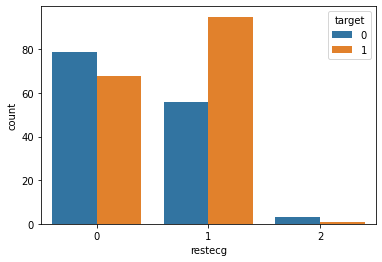

In [16]:
### Plotting a count plot of "restecg" variable.
sns.countplot(df.restecg, hue = df['target'])

From the above plot, We may assume that patients that had type "2" "Resting ECG" are less susceptible to "Cardio Vascular Disease".

<AxesSubplot:xlabel='thal', ylabel='count'>

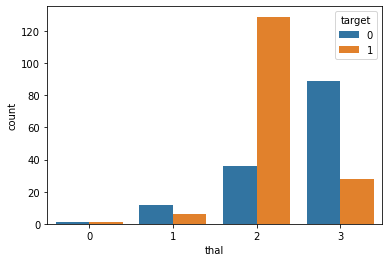

In [17]:
### Plotting a count plot of "thal" variable.
sns.countplot(df.thal,hue = df['target'])

From the above plot, We may assume that patients that experienced type "2" "Thalassemia"(fixed defect) are more susceptible to "Cardio Vascular Disease".

# 5. Study the occurrence of CVD across different ages.

<AxesSubplot:xlabel='age', ylabel='target'>

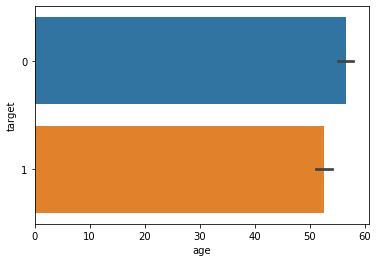

In [18]:
### Plotting "age" Vs "target" barplot ...(Occurrence of CVD across different ages)
sns.barplot(x = "age", y = "target", data = df)

From the above plot, We may assume that "Age" of patients does not seem to affect their susceptiblity to "Cardio Vascular Disease".

# 6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?

<AxesSubplot:xlabel='trestbps', ylabel='target'>

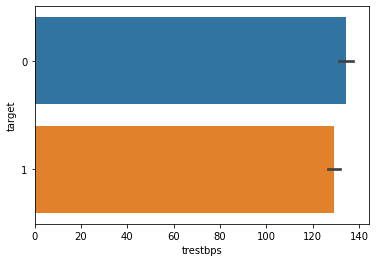

In [19]:
### Plotting "trestbps" Vs "target" barplot ...(detect CVD based on anomalies in resting blood pressure )
sns.barplot(x = "trestbps", y = "target", data = df)

From the above plot, We may assume that high "Resting BP" (above 120 ) does seem to increase susceptiblity to "Cardio Vascular Disease".

# 7. Study the composition of overall patients w.r.t . gender.

<AxesSubplot:xlabel='sex', ylabel='count'>

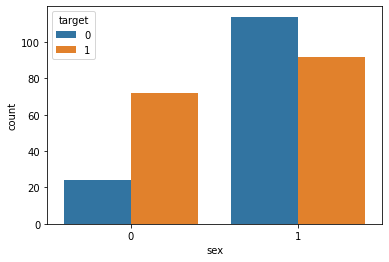

In [20]:
### Plotting "sex" Vs "target" barplot ...(composition of overall patients w.r.t . gender. )
sns.countplot(df.sex,hue = df["target"])

From the above plot, We may assume "Females"(0) are susceptible to Cardio Vascular Disease.

# 8.Describe the relationship between cholesterol levels and our target variable.

<AxesSubplot:xlabel='chol', ylabel='target'>

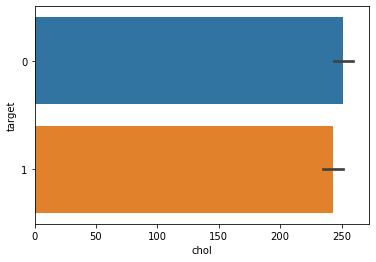

In [21]:
### Plotting "chol" Vs "target" barplot ...(relationship between cholesterol levels and target variable. )
sns.barplot(x = "chol", y = "target", data = df)

From the above plot, We may assume that high "Cholestrol" (above 200mg/dl ) does seem to increase susceptiblity to "Cardio Vascular Disease".

# 9. What can be concluded about the relationship between peak exercising and occurrence of heart attack?

<AxesSubplot:xlabel='oldpeak', ylabel='target'>

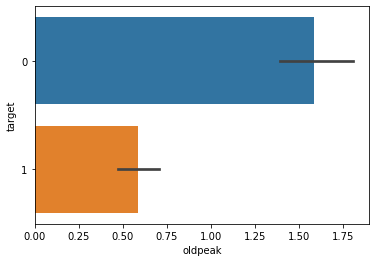

In [22]:
### Plotting "oldpeak" Vs "target" barplot ...(relationship between peak exercising and occurrence of heart attack.)
sns.barplot(x = "oldpeak", y = "target", data = df)

 From the above plot, We may assume that less "ST depression induced by exercise relative to rest" (<0.6) reflects susceptiblity to "Cardio vascular Disease" 

# 10.Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

<AxesSubplot:xlabel='thal', ylabel='count'>

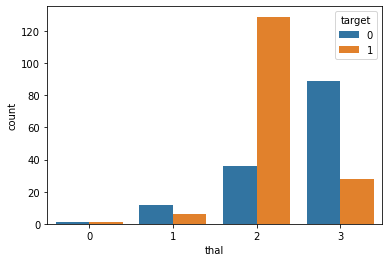

In [23]:
### Plotting a count plot of "thal" variable.(thalassemia Vs CVD)
sns.countplot(df.thal, hue = df['target'])

From the above plot, We may assume that patients that experienced type "2" "Thalassemia"(fixed defect) are more susceptible to "Cardio Vascular Disease".

# 11.Use a pair plot to understand the relationship between all the given variables.



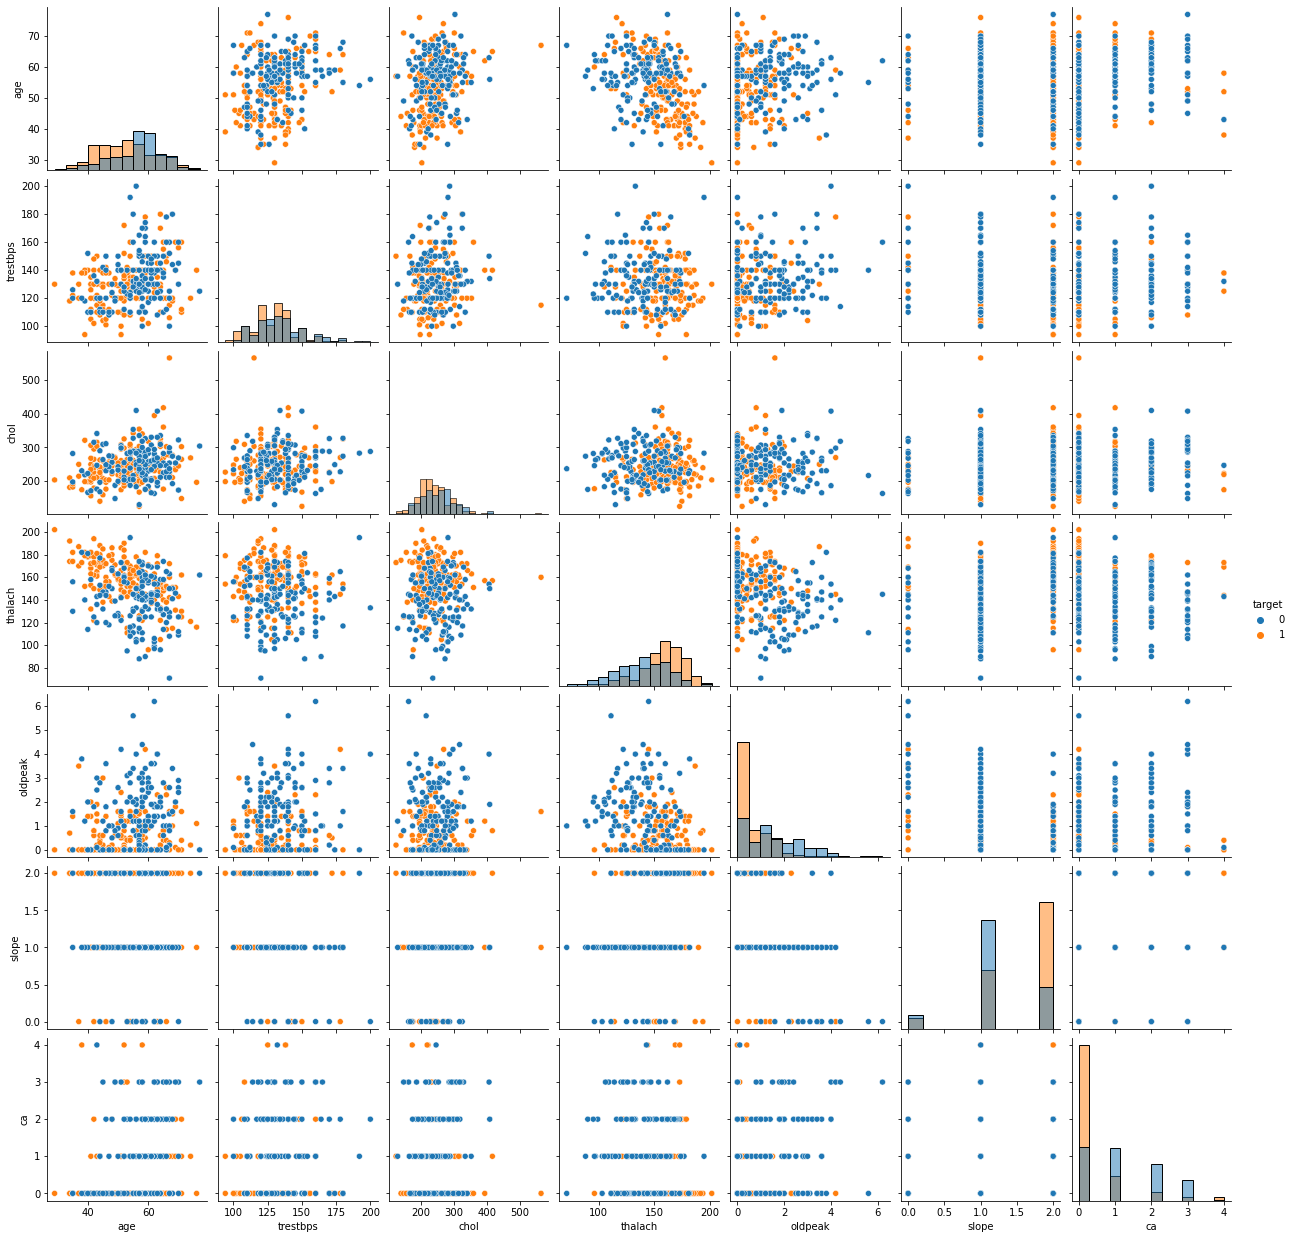

In [24]:
### Plotting a pairplot of "Continous" variable.
sns.pairplot(df, hue = "target", diag_kind = "hist")

# Normalisation:

To obtain optimum result we can "Normalize" the continous variables prior to "Modelling"

In [25]:
### Importing "Z score " from scipy.stats
from scipy.stats import zscore
df[Continous]

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,63,145,233,150,2.3,0,0
1,37,130,250,187,3.5,0,0
2,41,130,204,172,1.4,2,0
3,56,120,236,178,0.8,2,0
4,57,120,354,163,0.6,2,0
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0
299,45,110,264,132,1.2,1,0
300,68,144,193,141,3.4,1,2
301,57,130,131,115,1.2,1,1


In [26]:
# Applying zscore to df[continous]
df[Continous].apply(zscore)

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,0.949794,0.764066,-0.261285,0.018826,1.084022,-2.271182,-0.714911
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,-2.271182,-0.714911
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0.979514,-0.714911
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,0.979514,-0.714911
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0.979514,-0.714911
...,...,...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060,-0.645834,-0.714911
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360,-0.645834,-0.714911
300,1.503322,0.707035,-1.035462,-0.374779,2.032684,-0.645834,1.274980
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360,-0.645834,0.280034


In [27]:
### Rounding up  we get means = 0 ,std = 1 i.e  (N~(0,1))
df[Continous].apply(zscore).describe().round()

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,302.0,302.0,302.0,302.0,302.0,302.0,302.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-2.0,-2.0,-3.0,-1.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,-0.0,-1.0,-1.0
75%,1.0,0.0,1.0,1.0,0.0,1.0,0.0
max,2.0,4.0,6.0,2.0,4.0,1.0,3.0


Post Normalisation the "Mean" of all Continous Variables = "0" and the STD = "1" ie,


All continous variable are assuming "Normal Distribution" (N~(0,1))

# Creating x(predictor) and y(target) variables:

In [28]:
#### Extracting the target variable....
target = df['target']
target.unique()

[1, 0]
Categories (2, int64): [1, 0]

In [29]:
### Dropping the target variable from the dataset... 
features = df.drop('target',axis = 1 , inplace = True)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [30]:
### creating x(predictor), y(target) variables.. 
x = df.values
y = target.values

# Data Modelling:

# 12. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.



In [31]:
### Importing train_test_split model from sklearn and Splitting the data into train and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (241, 13)
x_test: (61, 13)
y_train: (241,)
y_test: (61,)


In [32]:
### Importing logisticregression from sklearn and Creating an instance of LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression   
LogReg = LogisticRegression()

In [33]:
### fitting the data into the model

LogReg.fit(x_train,y_train)

LogisticRegression()

In [34]:
#### prediction :
y_pred = LogReg.predict(x_test)

# Evaluation:

In [35]:
### Importing "accuracy_score" , "confution_matrix" and "Classification_report" from sklearn.metrics.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [36]:
### model accuracy :

Accuracy = accuracy_score(y_pred,y_test)
print("Accuracy of the Logistic Regression model is :", Accuracy)

Accuracy of the Logistic Regression model is : 0.8032786885245902


Thus, the above Logistic Regression model give predictio accuracy of 80.32 %

In [37]:
### Confution matrix:

Conf_mat = confusion_matrix(y_pred,y_test)
print("Confution Matrix:\n" ,Conf_mat)

Confution Matrix:
 [[20  3]
 [ 9 29]]


Thus from the Confution matrix we find:


True Negatives = 20,
False Negatives = 9, 
False Positives = 3, 
True Positives = 29,



In [38]:
### Classification report:

labels = ['Healthy','Diseased']
print("Classification_Report:\n", classification_report(y_pred,y_test,target_names= labels))

Classification_Report:
               precision    recall  f1-score   support

     Healthy       0.69      0.87      0.77        23
    Diseased       0.91      0.76      0.83        38

    accuracy                           0.80        61
   macro avg       0.80      0.82      0.80        61
weighted avg       0.82      0.80      0.81        61



Accuracy in Predicting if a patient has "Cardio Vascular Disease" (Heart Attack) is " 83% "

Accuracy in Predicting if a patient is "Healthy" is " 77% "

Thus Over all "Accuracy" of the "Logistic Regression " Algorithm  is " 80% "